Quantitative Analysis

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import plotly.express as pe
import os
import sys
import nltk

# Download NLTK resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Add the parent directory to the Python path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

# Debug: Print current working directory and Python path
print('Current working directory:', os.getcwd())
print('Python path:', sys.path)

# Load data
from src.data_loader import load_data
from src.data_analyzer import get_summary_statistics
from scripts.quantitative_analysis import (
    plot_technical_vs_close,
    plot_closing_prices,
    add_technical_indicators,
    plot_sentiment_distribution,
    compute_sentiment_score,
    plot_publisher_sentiment,
    check_missing_values,
    compute_descriptive_statistics
)



Current working directory: c:\Users\Daniel.Temesgen\Desktop\KIAM\Week1\notebooks
Python path: ['C:\\Users\\Daniel.Temesgen\\AppData\\Local\\Programs\\Python\\Python313\\python313.zip', 'C:\\Users\\Daniel.Temesgen\\AppData\\Local\\Programs\\Python\\Python313\\DLLs', 'C:\\Users\\Daniel.Temesgen\\AppData\\Local\\Programs\\Python\\Python313\\Lib', 'C:\\Users\\Daniel.Temesgen\\AppData\\Local\\Programs\\Python\\Python313', 'c:\\Users\\Daniel.Temesgen\\Desktop\\KIAM\\Week1\\venv_wk1', '', 'c:\\Users\\Daniel.Temesgen\\Desktop\\KIAM\\Week1\\venv_wk1\\Lib\\site-packages', 'c:\\Users\\Daniel.Temesgen\\Desktop\\KIAM\\Week1\\venv_wk1\\Lib\\site-packages\\win32', 'c:\\Users\\Daniel.Temesgen\\Desktop\\KIAM\\Week1\\venv_wk1\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Daniel.Temesgen\\Desktop\\KIAM\\Week1\\venv_wk1\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\Daniel.Temesgen\\Desktop\\KIAM\\Week1', 'c:\\Users\\Daniel.Temesgen\\Desktop\\KIAM\\Week1', 'c:\\Users\\Daniel.Temesgen\\Desktop\\KIAM\\Week1']

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Daniel.Temesgen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Daniel.Temesgen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Daniel.Temesgen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Historical Data AApl

In [13]:
# Load data
file_path = r'c:\Users\Daniel.Temesgen\Desktop\data\AAPL_historical_data.csv'
df_aapl = load_data(file_path)
df_aapl.head()

2025-05-31 13:21:38,852 - INFO - Successfully loaded data from c:\Users\Daniel.Temesgen\Desktop\data\AAPL_historical_data.csv with 10998 rows


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


Historical Data of AMZN Load

In [14]:
# Load data
file_path = r'c:\Users\Daniel.Temesgen\Desktop\data\AMZN_historical_data.csv'
df_amzn = load_data(file_path)
df_amzn.head()

2025-05-31 13:23:15,848 - INFO - Successfully loaded data from c:\Users\Daniel.Temesgen\Desktop\data\AMZN_historical_data.csv with 6846 rows


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0


Historical Data of GOOG Load

In [15]:
# Load data
file_path = r'c:\Users\Daniel.Temesgen\Desktop\data\GOOG_historical_data.csv'
df_goog = load_data(file_path)
df_goog.head()

2025-05-31 13:24:49,406 - INFO - Successfully loaded data from c:\Users\Daniel.Temesgen\Desktop\data\GOOG_historical_data.csv with 5020 rows


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0


Historical Data of META Load

In [16]:
# Load data
file_path = r'c:\Users\Daniel.Temesgen\Desktop\data\META_historical_data.csv'
df_meta = load_data(file_path)
df_meta.head()

2025-05-31 13:26:01,662 - INFO - Successfully loaded data from c:\Users\Daniel.Temesgen\Desktop\data\META_historical_data.csv with 2926 rows


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0
1,2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0
2,2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0
3,2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0
4,2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0


Historical Data of MSFT Load

In [17]:
# Load data
file_path = r'c:\Users\Daniel.Temesgen\Desktop\data\MSFT_historical_data.csv'
df_msft = load_data(file_path)
df_msft.head()

2025-05-31 13:27:02,251 - INFO - Successfully loaded data from c:\Users\Daniel.Temesgen\Desktop\data\MSFT_historical_data.csv with 9672 rows


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0


Historical Data of NVDA Load

In [18]:
# Load data
file_path = r'c:\Users\Daniel.Temesgen\Desktop\data\NVDA_historical_data.csv'
df_nvda = load_data(file_path)
df_nvda.head()

2025-05-31 13:33:12,144 - INFO - Successfully loaded data from c:\Users\Daniel.Temesgen\Desktop\data\NVDA_historical_data.csv with 6421 rows


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0


Historical Data of TSLA Load

In [19]:
# Load data
file_path = r'c:\Users\Daniel.Temesgen\Desktop\data\TSLA_historical_data.csv'
df_tsla = load_data(file_path)
df_tsla.head()

2025-05-31 13:36:00,617 - INFO - Successfully loaded data from c:\Users\Daniel.Temesgen\Desktop\data\TSLA_historical_data.csv with 3545 rows


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0


Change Date time

In [20]:
df_aapl['Date']=pd.to_datetime(df_aapl['Date'])
df_goog['Date']=pd.to_datetime(df_goog['Date'])
df_amzn['Date']=pd.to_datetime(df_amzn['Date'])
df_msft['Date']=pd.to_datetime(df_msft['Date'])
df_nvda['Date']=pd.to_datetime(df_nvda['Date'])
df_meta['Date']=pd.to_datetime(df_meta['Date'])
df_tsla['Date']=pd.to_datetime(df_tsla['Date'])

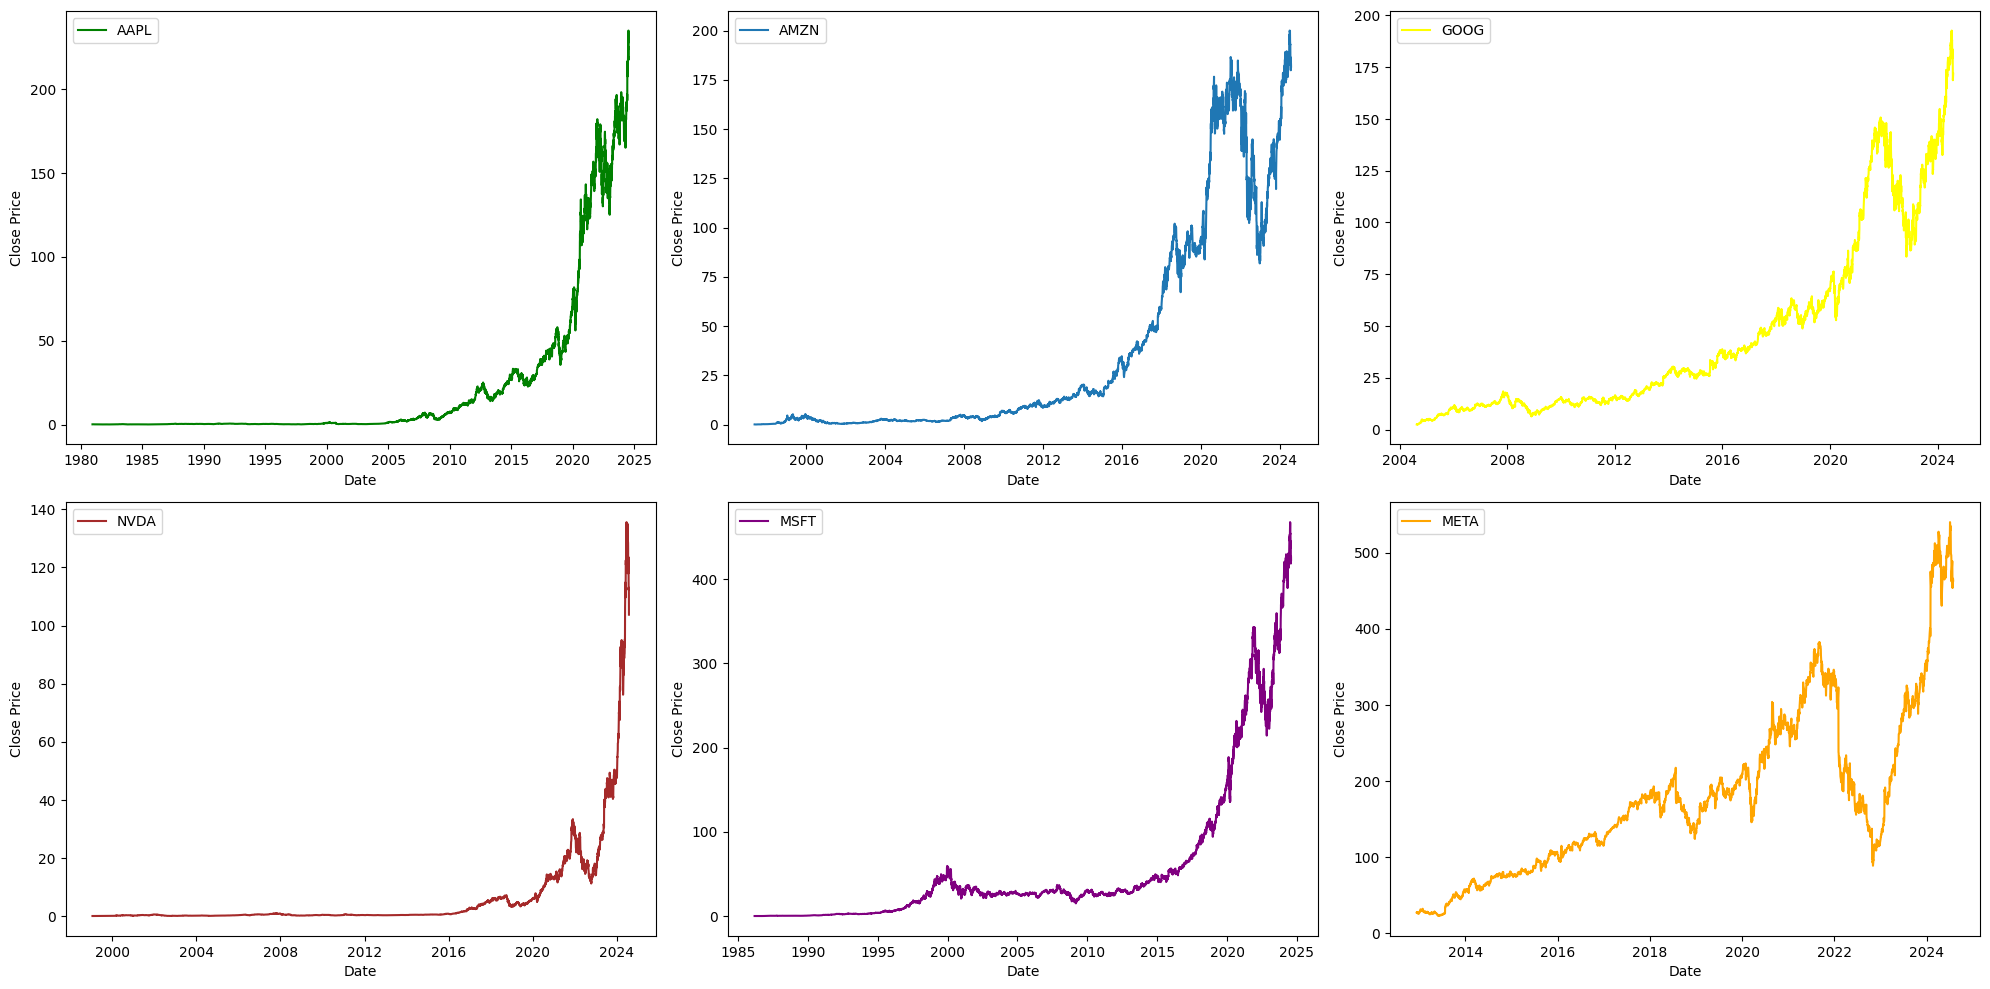

In [21]:
plot_closing_prices(df_aapl, df_amzn, df_goog, df_meta, df_msft, df_nvda)

In [22]:
add_technical_indicators(df_aapl)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,EMA,RSI,MACD,MACD_Signal
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10993,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,224.228500,222.376929,48.687742,4.662717,6.678882
10994,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,224.440500,221.911508,47.386437,3.748082,6.092722
10995,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,224.633500,221.535174,48.055700,3.026267,5.479431
10996,2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0,225.014500,221.221349,48.476184,2.448591,4.873263


In [23]:
add_technical_indicators(df_meta)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,EMA,RSI,MACD,MACD_Signal
0,2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,2024-07-24,472.309998,476.299988,460.579987,461.269989,461.269989,17649700,0.0,0.0,502.223499,493.134155,36.964279,-6.550694,-1.274374
2922,2024-07-25,463.260010,463.549988,442.649994,453.410004,453.410004,18240500,0.0,0.0,499.237999,489.350903,34.814669,-8.810746,-2.781648
2923,2024-07-26,464.200012,469.769989,459.420013,465.700012,465.700012,14222400,0.0,0.0,496.545000,487.098437,40.628601,-9.500635,-4.125446
2924,2024-07-29,469.880005,473.959991,465.019989,465.709991,465.709991,11339600,0.0,0.0,494.619499,485.061442,40.633231,-9.932081,-5.286773


In [24]:
add_technical_indicators(df_goog)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,EMA,RSI,MACD,MACD_Signal
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,2024-07-24,175.389999,177.949997,173.570007,174.369995,174.369995,31250700,0.0,0.0,185.500001,183.080916,37.434718,-0.034166,1.571016
5016,2024-07-25,174.250000,175.199997,169.050003,169.160004,169.160004,28967900,0.0,0.0,184.689501,181.755115,32.279082,-1.106693,1.035474
5017,2024-07-26,168.770004,169.839996,165.865005,168.679993,168.679993,25150100,0.0,0.0,183.780501,180.509865,31.843937,-1.972672,0.433845
5018,2024-07-29,170.500000,172.160004,169.720001,171.130005,171.130005,13768900,0.0,0.0,183.166001,179.616545,36.545844,-2.433223,-0.139569


In [25]:
add_technical_indicators(df_msft)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,EMA,RSI,MACD,MACD_Signal
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9667,2024-07-24,440.450012,441.480011,427.589996,428.899994,428.128326,26805800,0.0,0.0,451.887498,446.197526,36.980921,-0.684986,3.013510
9668,2024-07-25,428.799988,429.799988,417.510010,418.399994,417.647217,29943800,0.0,0.0,450.199498,443.550142,31.696381,-2.740453,1.862718
9669,2024-07-26,418.200012,428.920013,417.269989,425.269989,424.504852,23583800,0.0,0.0,448.820497,441.809175,37.944660,-3.771598,0.735855
9670,2024-07-29,431.579987,432.149994,424.700012,426.730011,425.962250,15125800,0.0,0.0,447.809497,440.373064,39.217239,-4.420024,-0.295321


In [26]:
add_technical_indicators(df_nvda)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,EMA,RSI,MACD,MACD_Signal
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6416,2024-07-24,119.169998,119.949997,113.440002,114.250000,114.250000,327776900,0.0,0.0,124.9165,123.060740,41.589800,-0.007652,1.879233
6417,2024-07-25,113.040001,116.629997,106.300003,112.279999,112.279999,460067000,0.0,0.0,124.2105,122.034003,39.943932,-0.817813,1.339824
6418,2024-07-26,116.190002,116.199997,111.580002,113.059998,113.059998,293399100,0.0,0.0,123.6640,121.179336,40.940507,-1.381013,0.795656
6419,2024-07-29,113.690002,116.279999,111.300003,111.589996,111.589996,248152100,0.0,0.0,123.0665,120.266065,39.606589,-1.923793,0.251767


In [31]:
# Load historical data for all stocks
stocks = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']
stock_dfs = {}

for stock in stocks:
    file_path = os.path.join('..', 'data', f'{stock}_historical_data.csv')
    try:
        df = load_data(file_path)
        stock_dfs[stock] = df
        print(f"Loaded {stock} data with {len(df)} rows")
        display(df.head())
    except FileNotFoundError:
        print(f"Error: {stock}_historical_data.csv not found in ../data/")

# Assign DataFrames to individual variables for compatibility with existing code
df_aapl = stock_dfs.get('AAPL')
df_amzn = stock_dfs.get('AMZN')
df_goog = stock_dfs.get('GOOG')
df_meta = stock_dfs.get('META')
df_msft = stock_dfs.get('MSFT')
df_nvda = stock_dfs.get('NVDA')

2025-05-31 13:51:54,869 - ERROR - File not found: ..\data\AAPL_historical_data.csv
2025-05-31 13:51:54,871 - ERROR - File not found: ..\data\AMZN_historical_data.csv
2025-05-31 13:51:54,873 - ERROR - File not found: ..\data\GOOG_historical_data.csv
2025-05-31 13:51:54,875 - ERROR - File not found: ..\data\META_historical_data.csv
2025-05-31 13:51:54,876 - ERROR - File not found: ..\data\MSFT_historical_data.csv
2025-05-31 13:51:54,877 - ERROR - File not found: ..\data\NVDA_historical_data.csv


Error: AAPL_historical_data.csv not found in ../data/
Error: AMZN_historical_data.csv not found in ../data/
Error: GOOG_historical_data.csv not found in ../data/
Error: META_historical_data.csv not found in ../data/
Error: MSFT_historical_data.csv not found in ../data/
Error: NVDA_historical_data.csv not found in ../data/
